# Synthetic Survey Data Generator

In [1]:
!pip3 install names
!pip3 install rstr


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import random
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
# from scipy.stats import skewnorm
import seaborn as sns

# for random strings generation
import rstr

# for random names generation
import names

In [3]:
# defaults 
NO_OF_RECORDS = 500
FILENAME = "simulated_data"

In [4]:
# NRIC generator
def generate_nric(): 
    return rstr.xeger(r'^[STFG]\d{7}[A-Z]$')

# for income generation
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [11]:
"""
Sample survey data
|---------- |-----------------|---------------|--------|-----------|
| NRIC      | researcher_name | sector        | income | degree    | 
|---------- |------------------------------------------------------|
| T8270500P | Ted Osborn      | Agricultural  | 6000   | Masters   |
| S6754779S | Edith Ward      | Aerospace     | 5000   | Bachelors |
| G4976879R | Eric Heard      | Engineering   | 7000   | Masters   |
| S4190526H | Franklin Brod   | Healthcare    | 9000   | PhD       |
|------------------------------------------------------------------|

Types:
NRIC: string 
researcher_name: string 
sector: string (categorical)
income: int 
degree: int (categorical) 
"""

# categorical attributes 
SECTOR_TYPES = ["Agricultural", "Aerospace", "Engineering", "Healthcare"] 
QUALIFICATION_TYPES = ["PhD", "Masters", "Bachelors", "Non-degree", "Post-grad"]

# constants
SKEW_PARAM = 2
INCOME_RANGE = [3000, 15000]

# NATIONALITY_TYPES = ["SC", "PR", "FC"]

def create_simulated_data(no_of_records=NO_OF_RECORDS):
    simulated_data = pd.DataFrame()
    
    # NRIC
    simulated_data["NRIC"] = [generate_nric() for _ in range(0, no_of_records)]
    
    # researcher_name
    simulated_data["researcher_name"] = [names.get_full_name() for _ in range(0, no_of_records)]
    
    # sector
    simulated_data["sector"] = np.random.choice(SECTOR_TYPES, size=no_of_records) 
    
    # income
    income_generator = get_truncated_normal(mean=0, sd=5000, low=INCOME_RANGE[0], upp=INCOME_RANGE[1])
    simulated_data["income"] = income_generator.rvs(no_of_records)
    simulated_data["income"] = [int(income) for income in simulated_data["income"]]
    

    # degree
    simulated_data["degree"] = np.random.choice(QUALIFICATION_TYPES, size=no_of_records) 
     
    return simulated_data

In [12]:
no_of_records = [200, 500, 1000, 10000]
for n in no_of_records:
    simulated_data = create_simulated_data(n)
    simulated_data.to_csv(f"data/{FILENAME}_{n}.csv", mode='w', index=False)

In [13]:
simulated_data

,NRIC,researcher_name,sector,income,degree
0,S7212245T,Ernesto Griffin,Aerospace,4876,Non-degree
1,F0642125K,Margaret Mays,Healthcare,6685,Non-degree
2,G2319709V,David Hendryx,Engineering,8337,Masters
3,F4712075F,John Hagens,Agricultural,3504,Masters
4,T5654604E,Michael Shaddix,Engineering,5232,Masters
...,...,...,...,...,...
9995,F2490729V,Herbert Nimox,Aerospace,5143,PhD
9996,S9362124H,Aaron Crase,Agricultural,3840,Bachelors
9997,T9725536O,Anthony Cooper,Agricultural,6458,Non-degree
9998,G9049833S,Amy Morrical,Agricultural,4734,Bachelors


### Income distribution

<AxesSubplot:xlabel='income', ylabel='Count'>

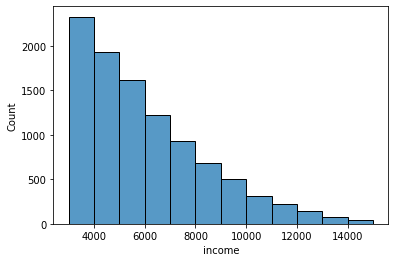

In [14]:
sns.histplot(data=simulated_data['income'], binwidth=1000)